# EDA: DoubleMuon2016G (Local ROOT files)

**Base path:** `/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted`

We will:
1. List ROOT files and sanity-check sizes
2. Inspect NanoAOD structure (`Events` tree, branches)
3. Read a small slice (`entry_stop`) for fast EDA
4. Do event-level + muon-level + dimuon invariant mass EDA
5. Inventory `HLT_*` triggers and estimate fired fractions
6. Repeat quick summaries across multiple ROOT files to check stability


In [1]:
# Cell 1 — Install deps (no XRootD needed)
!pip -q install "uproot>=5" awkward vector rich tqdm pandas pyarrow fastparquet matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.7/656.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.3 MB/s eta 0:00:00


In [2]:
# Cell 2 — Imports & config
import os
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import awkward as ak
import uproot
import vector
import matplotlib.pyplot as plt

vector.register_awkward()

BASE_PATH = Path("/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted")

SEED = 42
np.random.seed(SEED)

BASE_PATH


PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted')

In [3]:
# Cell 3 — List ROOT files
root_files = sorted(BASE_PATH.glob("*.root"))
len(root_files), root_files[:5]


(5,
 [PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted/doublemuon2016g_0.root'),
  PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted/doublemuon2016g_1.root'),
  PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted/doublemuon2016g_2.root'),
  PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted/doublemuon2016g_3.root'),
  PosixPath('/kaggle/input/datasets/katakuricharlotte/doublemuon2016g-rootfiles/root_converted/doublemuon2016g_4.root')])

In [4]:
# Cell 4 — File sizes (sanity check)
sizes = []
for p in root_files:
    sizes.append({"file": p.name, "size_MB": p.stat().st_size / 1e6})
sizes_df = pd.DataFrame(sizes).sort_values("size_MB", ascending=False)

sizes_df.head(10), sizes_df["size_MB"].describe()


(                     file      size_MB
 1  doublemuon2016g_1.root  2284.233920
 2  doublemuon2016g_2.root  2267.718185
 4  doublemuon2016g_4.root  2156.693520
 0  doublemuon2016g_0.root  2155.974646
 3  doublemuon2016g_3.root  1020.848175,
 count       5.000000
 mean     1977.093689
 std       537.926040
 min      1020.848175
 25%      2155.974646
 50%      2156.693520
 75%      2267.718185
 max      2284.233920
 Name: size_MB, dtype: float64)

## Inspect one ROOT file (structure and branch inventory)

NanoAOD files typically contain an `Events` TTree (main event content), and sometimes `Runs` / `LuminosityBlocks`. [web:104]


In [5]:
# Cell 5 — Open one file and inspect keys
test_file = str(root_files[0])
f = uproot.open(test_file)

f.keys()


['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [6]:
# Cell 6 — Inspect Events tree and branches
events = f["Events"]
branch_names = events.keys()

len(branch_names), branch_names[:40]


(1380,
 ['run',
  'luminosityBlock',
  'event',
  'nboostedTau',
  'boostedTau_chargedIso',
  'boostedTau_eta',
  'boostedTau_leadTkDeltaEta',
  'boostedTau_leadTkDeltaPhi',
  'boostedTau_leadTkPtOverTauPt',
  'boostedTau_mass',
  'boostedTau_neutralIso',
  'boostedTau_phi',
  'boostedTau_photonsOutsideSignalCone',
  'boostedTau_pt',
  'boostedTau_puCorr',
  'boostedTau_rawAntiEle2018',
  'boostedTau_rawIso',
  'boostedTau_rawIsodR03',
  'boostedTau_rawMVAnewDM2017v2',
  'boostedTau_rawMVAoldDM2017v2',
  'boostedTau_rawMVAoldDMdR032017v2',
  'boostedTau_charge',
  'boostedTau_decayMode',
  'boostedTau_jetIdx',
  'boostedTau_rawAntiEleCat2018',
  'boostedTau_idAntiEle2018',
  'boostedTau_idAntiMu',
  'boostedTau_idMVAnewDM2017v2',
  'boostedTau_idMVAoldDM2017v2',
  'boostedTau_idMVAoldDMdR032017v2',
  'CaloMET_phi',
  'CaloMET_pt',
  'CaloMET_sumEt',
  'ChsMET_phi',
  'ChsMET_pt',
  'ChsMET_sumEt',
  'nCorrT1METJet',
  'CorrT1METJet_area',
  'CorrT1METJet_eta',
  'CorrT1METJet_muonSubtr

In [7]:
# Cell 7 — Quick branch search helper
def find_branches(prefix, names):
    return sorted([n for n in names if n.startswith(prefix)])

for pref in ["run", "luminosityBlock", "event", "PV_", "MET_", "Muon_", "HLT_"]:
    hits = [pref] if pref in branch_names else find_branches(pref, branch_names)
    print(pref, "->", len(hits))
    print(hits[:25], "\n")


run -> 1
['run'] 

luminosityBlock -> 1
['luminosityBlock'] 

event -> 1
['event'] 

PV_ -> 8
['PV_chi2', 'PV_ndof', 'PV_npvs', 'PV_npvsGood', 'PV_score', 'PV_x', 'PV_y', 'PV_z'] 

MET_ -> 10
['MET_MetUnclustEnUpDeltaX', 'MET_MetUnclustEnUpDeltaY', 'MET_covXX', 'MET_covXY', 'MET_covYY', 'MET_phi', 'MET_pt', 'MET_significance', 'MET_sumEt', 'MET_sumPtUnclustered'] 

Muon_ -> 55
['Muon_charge', 'Muon_cleanmask', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dxybs', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_fsrPhotonIdx', 'Muon_highPtId', 'Muon_highPurity', 'Muon_inTimeMuon', 'Muon_ip3d', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isStandalone', 'Muon_isTracker', 'Muon_jetIdx', 'Muon_jetNDauCharged', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_looseId', 'Muon_mass', 'Muon_mediumId', 'Muon_mediumPromptId'] 

HLT_ -> 556
['HLT_AK4CaloJet100', 'HLT_AK4CaloJet30', 'HLT_AK4CaloJet40', 'HLT_AK4CaloJet50', 'HLT_AK4CaloJet80', 'HLT_AK4PFJet100', 'HLT_AK4PFJet30', 'HLT_AK4PFJet50', 'HLT_AK4PFJet80', 'HLT_AK8DiPFJ

In [8]:
# Cell 7 — Quick branch search helper
def find_branches(prefix, names):
    return sorted([n for n in names if n.startswith(prefix)])

for pref in ["run", "luminosityBlock", "event", "PV_", "MET_", "Muon_", "HLT_"]:
    hits = [pref] if pref in branch_names else find_branches(pref, branch_names)
    print(pref, "->", len(hits))
    print(hits[:25], "\n")


run -> 1
['run'] 

luminosityBlock -> 1
['luminosityBlock'] 

event -> 1
['event'] 

PV_ -> 8
['PV_chi2', 'PV_ndof', 'PV_npvs', 'PV_npvsGood', 'PV_score', 'PV_x', 'PV_y', 'PV_z'] 

MET_ -> 10
['MET_MetUnclustEnUpDeltaX', 'MET_MetUnclustEnUpDeltaY', 'MET_covXX', 'MET_covXY', 'MET_covYY', 'MET_phi', 'MET_pt', 'MET_significance', 'MET_sumEt', 'MET_sumPtUnclustered'] 

Muon_ -> 55
['Muon_charge', 'Muon_cleanmask', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dxybs', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_fsrPhotonIdx', 'Muon_highPtId', 'Muon_highPurity', 'Muon_inTimeMuon', 'Muon_ip3d', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isStandalone', 'Muon_isTracker', 'Muon_jetIdx', 'Muon_jetNDauCharged', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_looseId', 'Muon_mass', 'Muon_mediumId', 'Muon_mediumPromptId'] 

HLT_ -> 556
['HLT_AK4CaloJet100', 'HLT_AK4CaloJet30', 'HLT_AK4CaloJet40', 'HLT_AK4CaloJet50', 'HLT_AK4CaloJet80', 'HLT_AK4PFJet100', 'HLT_AK4PFJet30', 'HLT_AK4PFJet50', 'HLT_AK4PFJet80', 'HLT_AK8DiPFJ

## Load a small EDA slice (fast)

We read only the branches needed for EDA using `events.arrays(...)`.  
If you increase `ENTRY_STOP`, you’ll get smoother distributions but more time/memory. [web:103]


In [9]:
# Cell 8 — Choose EDA branches
BASE_BRANCHES = ["run", "luminosityBlock", "event", "PV_npvs", "MET_pt", "MET_phi"]
MUON_BRANCHES = [
    "nMuon",  # often present in NanoAOD
    "Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge",
    "Muon_tightId", "Muon_mediumId",
    "Muon_pfRelIso03_all", "Muon_dxy", "Muon_dz"
]

wanted = [b for b in (BASE_BRANCHES + MUON_BRANCHES) if b in branch_names]
missing = sorted(set(BASE_BRANCHES + MUON_BRANCHES) - set(wanted))

wanted, missing


(['run',
  'luminosityBlock',
  'event',
  'PV_npvs',
  'MET_pt',
  'MET_phi',
  'nMuon',
  'Muon_pt',
  'Muon_eta',
  'Muon_phi',
  'Muon_charge',
  'Muon_tightId',
  'Muon_mediumId',
  'Muon_pfRelIso03_all',
  'Muon_dxy',
  'Muon_dz'],
 [])

In [10]:
# Cell 9 — Read arrays (small slice)
ENTRY_STOP = 200_000  # adjust if needed
arr = events.arrays(wanted, entry_stop=ENTRY_STOP, library="ak")

arr.fields


['run',
 'luminosityBlock',
 'event',
 'PV_npvs',
 'MET_pt',
 'MET_phi',
 'nMuon',
 'Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_charge',
 'Muon_tightId',
 'Muon_mediumId',
 'Muon_pfRelIso03_all',
 'Muon_dxy',
 'Muon_dz']

In [11]:
# Cell 10 — Event-level EDA
df_evt = pd.DataFrame({
    "run": ak.to_numpy(arr["run"]) if "run" in arr.fields else np.nan,
    "lumi": ak.to_numpy(arr["luminosityBlock"]) if "luminosityBlock" in arr.fields else np.nan,
    "event": ak.to_numpy(arr["event"]) if "event" in arr.fields else np.nan,
    "PV_npvs": ak.to_numpy(arr["PV_npvs"]) if "PV_npvs" in arr.fields else np.nan,
    "MET_pt": ak.to_numpy(arr["MET_pt"]) if "MET_pt" in arr.fields else np.nan,
})

df_evt.describe(include="all")


,run,lumi,event,PV_npvs,MET_pt
count,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000
mean,278851.966855,540.665870,9.490940e+08,17.750955,30.099030
std,25.992960,480.564378,8.140755e+08,6.655188,20.305264
min,278822.000000,24.000000,4.521448e+07,1.000000,0.034405
25%,278822.000000,89.000000,1.771529e+08,12.000000,16.365921
50%,278874.000000,229.000000,4.465757e+08,17.000000,26.308333
75%,278875.000000,1035.000000,1.793268e+09,23.000000,39.147439
max,278875.000000,1300.000000,2.203698e+09,65.000000,716.770996


In [12]:
# Cell 11 — Muon multiplicity
if "nMuon" in arr.fields:
    nmu = ak.to_numpy(arr["nMuon"])
else:
    nmu = ak.to_numpy(ak.num(arr["Muon_pt"]))

pd.Series(nmu).value_counts().sort_index().head(25), pd.Series(nmu).describe()


(0       2188
 1      41980
 2     108798
 3      37062
 4       7807
 5       1619
 6        359
 7        107
 8         42
 9         27
 10         6
 11         4
 13         1
 Name: count, dtype: int64,
 count    200000.000000
 mean          2.068420
 std           0.850707
 min           0.000000
 25%           2.000000
 50%           2.000000
 75%           2.000000
 max          13.000000
 dtype: float64)

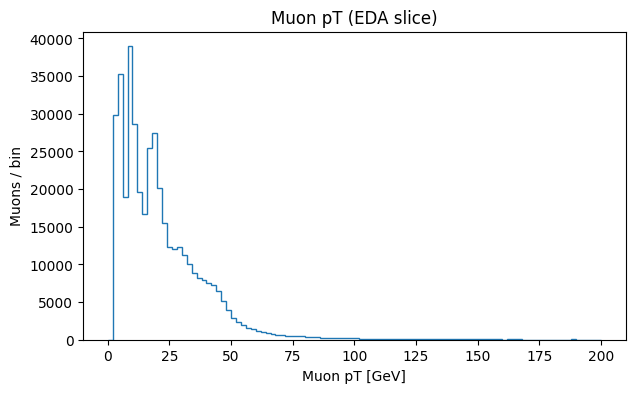

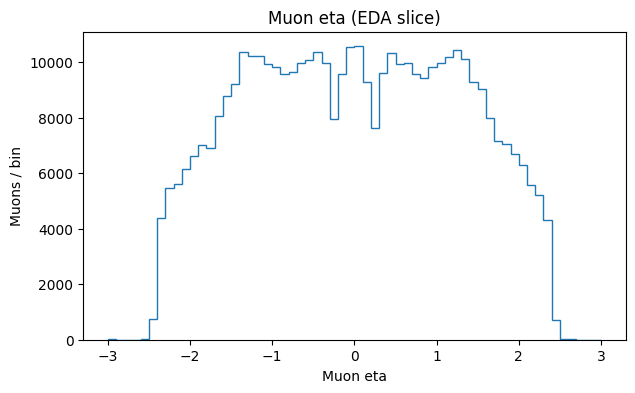

In [13]:
# Cell 12 — Muon kinematics (flatten)
mu_pt = ak.flatten(arr["Muon_pt"])
mu_eta = ak.flatten(arr["Muon_eta"])
mu_phi = ak.flatten(arr["Muon_phi"])

plt.figure(figsize=(7,4))
plt.hist(ak.to_numpy(mu_pt), bins=100, range=(0, 200), histtype="step")
plt.xlabel("Muon pT [GeV]")
plt.ylabel("Muons / bin")
plt.title("Muon pT (EDA slice)")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(ak.to_numpy(mu_eta), bins=60, range=(-3, 3), histtype="step")
plt.xlabel("Muon eta")
plt.ylabel("Muons / bin")
plt.title("Muon eta (EDA slice)")
plt.show()


## Dimuon invariant mass (sanity check)

We form opposite-sign muon pairs and plot \(m_{\mu\mu}\). This is a standard validation step in NanoAOD-style analyses. [web:103]


In [14]:
# Cell 13 — Dimuon mass
MUON_MASS = 0.105658  # GeV

mu = vector.zip({
    "pt": arr["Muon_pt"],
    "eta": arr["Muon_eta"],
    "phi": arr["Muon_phi"],
    "mass": ak.ones_like(arr["Muon_pt"]) * MUON_MASS,
    "charge": arr["Muon_charge"],
})

# Simple quality selection (choose what exists)
qual = ak.ones_like(arr["Muon_pt"], dtype=bool)
if "Muon_mediumId" in arr.fields:
    qual = qual & (arr["Muon_mediumId"] == 1)
elif "Muon_tightId" in arr.fields:
    qual = qual & (arr["Muon_tightId"] == 1)

mu_sel = mu[qual]

pairs = ak.combinations(mu_sel, 2, fields=["m1", "m2"])
os_pairs = pairs[(pairs.m1.charge * pairs.m2.charge) < 0]
dimu = os_pairs.m1 + os_pairs.m2
m_mumu = ak.flatten(dimu.mass)

len(m_mumu), ak.to_numpy(m_mumu[:10])


(117706,
 array([ 0.7176877, 17.536045 ,  0.3284968, 15.175849 , 19.699652 ,
        88.300446 , 89.52388  , 95.44837  ,  3.0914607, 19.041288 ],
       dtype=float32))

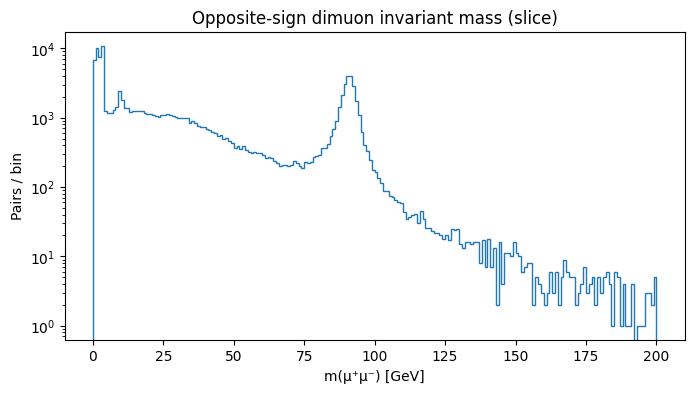

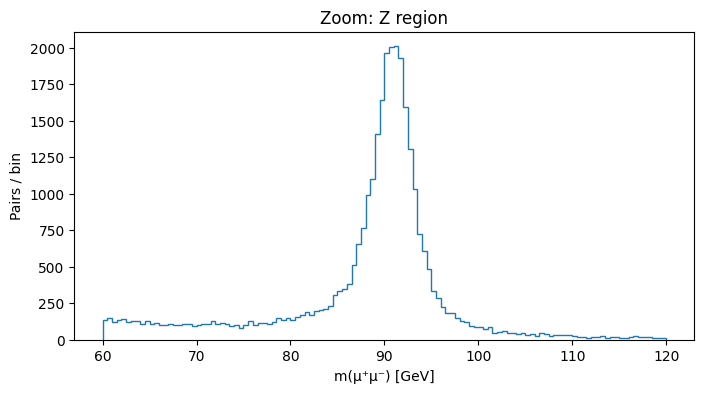

In [15]:
# Cell 14 — Plot dimuon mass (log scale + zoom)
plt.figure(figsize=(8,4))
plt.hist(ak.to_numpy(m_mumu), bins=200, range=(0, 200), histtype="step")
plt.xlabel("m(μ⁺μ⁻) [GeV]")
plt.ylabel("Pairs / bin")
plt.title("Opposite-sign dimuon invariant mass (slice)")
plt.yscale("log")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(ak.to_numpy(m_mumu), bins=120, range=(60, 120), histtype="step")
plt.xlabel("m(μ⁺μ⁻) [GeV]")
plt.ylabel("Pairs / bin")
plt.title("Zoom: Z region")
plt.show()


## Trigger (HLT_) inventory and fired fractions

We list `HLT_*` branches, then compute the fraction of events where each trigger fired in our slice. [web:103]


In [16]:
# Cell 15 — Inventory HLT branches
hlt_branches = find_branches("HLT_", branch_names)
len(hlt_branches), hlt_branches[:60]


(556,
 ['HLT_AK4CaloJet100',
  'HLT_AK4CaloJet30',
  'HLT_AK4CaloJet40',
  'HLT_AK4CaloJet50',
  'HLT_AK4CaloJet80',
  'HLT_AK4PFJet100',
  'HLT_AK4PFJet30',
  'HLT_AK4PFJet50',
  'HLT_AK4PFJet80',
  'HLT_AK8DiPFJet250_200_TrimMass30',
  'HLT_AK8DiPFJet250_200_TrimMass30_BTagCSV_p20',
  'HLT_AK8DiPFJet280_200_TrimMass30',
  'HLT_AK8DiPFJet280_200_TrimMass30_BTagCSV_p20',
  'HLT_AK8PFHT600_TrimR0p1PT0p03Mass50_BTagCSV_p20',
  'HLT_AK8PFHT650_TrimR0p1PT0p03Mass50',
  'HLT_AK8PFHT700_TrimR0p1PT0p03Mass50',
  'HLT_AK8PFJet140',
  'HLT_AK8PFJet200',
  'HLT_AK8PFJet260',
  'HLT_AK8PFJet320',
  'HLT_AK8PFJet360_TrimMass30',
  'HLT_AK8PFJet40',
  'HLT_AK8PFJet400',
  'HLT_AK8PFJet450',
  'HLT_AK8PFJet500',
  'HLT_AK8PFJet60',
  'HLT_AK8PFJet80',
  'HLT_BTagMu_AK8Jet300_Mu5',
  'HLT_BTagMu_DiJet110_Mu5',
  'HLT_BTagMu_DiJet170_Mu5',
  'HLT_BTagMu_DiJet20_Mu5',
  'HLT_BTagMu_DiJet40_Mu5',
  'HLT_BTagMu_DiJet70_Mu5',
  'HLT_BTagMu_Jet300_Mu5',
  'HLT_CaloJet500_NoJetID',
  'HLT_CaloMHTNoPU90_PFME

In [17]:
# Cell 16 — Read a subset of HLT paths (muon-related) and compute fired fraction
hlt_mu = [b for b in hlt_branches if "Mu" in b][:80]  # cap for speed

wanted_hlt = [b for b in (wanted + hlt_mu) if b in branch_names]
arr_hlt = events.arrays(wanted_hlt, entry_stop=ENTRY_STOP, library="ak")

hlt_rate = []
for b in hlt_mu:
    if b in arr_hlt.fields:
        hlt_rate.append((b, float(ak.mean(arr_hlt[b]))))

hlt_rate_df = pd.DataFrame(hlt_rate, columns=["HLT_path", "fired_fraction_in_slice"]).sort_values(
    "fired_fraction_in_slice", ascending=False
)

hlt_rate_df.head(30)


,HLT_path,fired_fraction_in_slice
44,HLT_IsoMu22,0.200375
50,HLT_IsoTkMu22,0.195310
45,HLT_IsoMu22_eta2p1,0.191880
46,HLT_IsoMu24,0.187750
51,HLT_IsoTkMu22_eta2p1,0.186445
52,HLT_IsoTkMu24,0.183845
47,HLT_IsoMu27,0.173990
53,HLT_IsoTkMu27,0.170605
13,HLT_DoubleIsoMu17_eta2p1_noDzCut,0.099140
12,HLT_DoubleIsoMu17_eta2p1,0.095105


## Stability across multiple ROOT files

We repeat a light summary across a few files to ensure distributions are consistent (no single-file artifact).  
For multi-file reads, Uproot provides efficient multi-file patterns (e.g., concatenate/iterate), but for EDA we keep it simple and sample a few files. [web:98]


In [18]:
# Cell 17 — Multi-file summarizer (fast)
def summarize_one(path, entry_stop=80_000):
    f = uproot.open(str(path))
    t = f["Events"]
    keys = t.keys()

    branches = [b for b in ["run","luminosityBlock","PV_npvs","MET_pt","Muon_pt","Muon_eta","Muon_phi","Muon_charge","Muon_mediumId","Muon_tightId"] if b in keys]
    a = t.arrays(branches, entry_stop=entry_stop, library="ak")

    nMuon = ak.num(a["Muon_pt"])
    mu_pt = ak.flatten(a["Muon_pt"])

    out = {
        "file": path.name,
        "nEvents": len(a["Muon_pt"]),
        "run_min": int(ak.min(a["run"])) if "run" in a.fields else None,
        "run_max": int(ak.max(a["run"])) if "run" in a.fields else None,
        "nMuon_mean": float(ak.mean(nMuon)),
        "nMuon_p95": float(np.quantile(ak.to_numpy(nMuon), 0.95)),
        "mu_pt_mean": float(ak.mean(mu_pt)),
        "mu_pt_p95": float(np.quantile(ak.to_numpy(mu_pt), 0.95)),
        "MET_mean": float(ak.mean(a["MET_pt"])) if "MET_pt" in a.fields else np.nan,
    }
    return out

N_FILES_CHECK = min(5, len(root_files))
files_check = root_files[:N_FILES_CHECK]

summaries = []
for p in tqdm(files_check, desc="Summarizing"):
    summaries.append(summarize_one(p, entry_stop=50_000))

sum_df = pd.DataFrame(summaries)
sum_df


Summarizing:   0%|          | 0/5 [00:00<?, ?it/s]

,file,nEvents,run_min,run_max,nMuon_mean,nMuon_p95,mu_pt_mean,mu_pt_p95,MET_mean
0,doublemuon2016g_0.root,50000,278822,278822,2.00860,3.0,24.045079,52.092232,26.457550
1,doublemuon2016g_1.root,50000,278820,278820,2.11182,4.0,30.336068,53.391090,31.659160
2,doublemuon2016g_2.root,50000,278822,278822,2.01102,3.0,23.845166,51.552277,26.586950
3,doublemuon2016g_3.root,50000,278820,278820,2.15120,4.0,30.724256,53.862232,32.890990
4,doublemuon2016g_4.root,50000,278820,278822,2.10698,4.0,32.953348,52.893799,31.602622


In [19]:
# Cell 18 — Save EDA summary for the report
out_csv = Path("/kaggle/working/eda_summaries.csv")
sum_df.to_csv(out_csv, index=False)
out_csv


PosixPath('/kaggle/working/eda_summaries.csv')

## Next step: turn EDA into the project dataset

After EDA, we will:
- Define labels (pick 3–6 HLT paths)
- Define feature schema (muon/dimuon features)
- Create a compact Parquet dataset for ML training/inference
- Add drift monitoring across run/lumi blocks (operations-style deliverable)
